# Importing the dependencies

In [77]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Reading the Dataset

In [2]:
titanic=pd.read_csv('train.csv')

# EDA

In [3]:
titanic.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
titanic['Survived'].value_counts()

0    424
1    288
Name: Survived, dtype: int64

In [36]:
titanic['Embarked'].value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

In [37]:
titanic['Sex'].value_counts()

male      453
female    259
Name: Sex, dtype: int64

In [38]:
titanic['Fare'].value_counts()

13.0000    41
26.0000    30
8.0500     29
10.5000    24
7.8958     23
           ..
6.2375      1
14.0000     1
9.4750      1
8.8500      1
10.5167     1
Name: Fare, Length: 219, dtype: int64

# Visualizing the dataset

<AxesSubplot:xlabel='Survived', ylabel='count'>

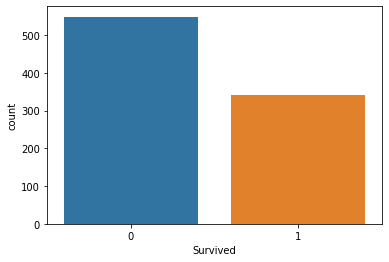

In [7]:
sns.countplot(x='Survived',data=titanic)

<AxesSubplot:xlabel='Age', ylabel='count'>

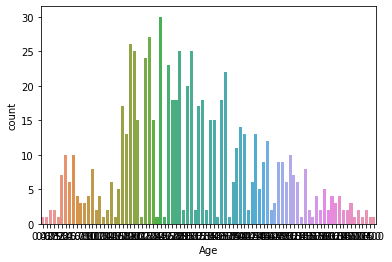

In [8]:
sns.countplot(x='Age',data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

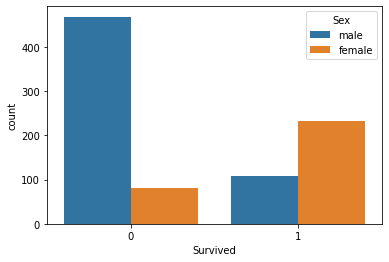

In [9]:
sns.countplot(x='Survived',hue='Sex',data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

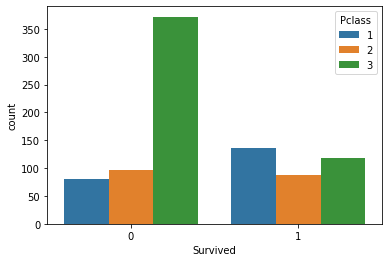

In [10]:
sns.countplot(x='Survived',hue='Pclass',data=titanic)

<AxesSubplot:ylabel='Frequency'>

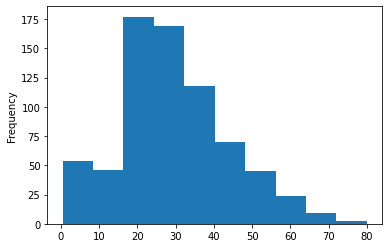

In [11]:
titanic['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

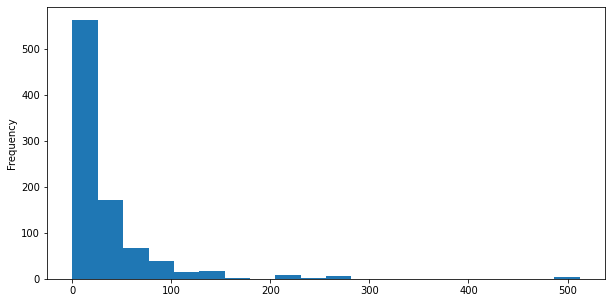

In [13]:
titanic['Fare'].plot.hist(bins=20, figsize=(10,5))

<AxesSubplot:xlabel='SibSp', ylabel='count'>

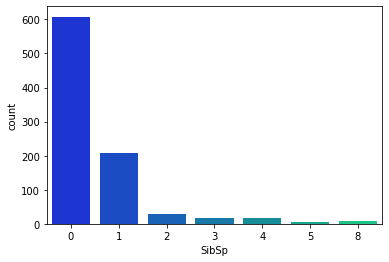

In [14]:
sns.countplot(x='SibSp',data=titanic,palette='winter')

<AxesSubplot:xlabel='Parch', ylabel='count'>

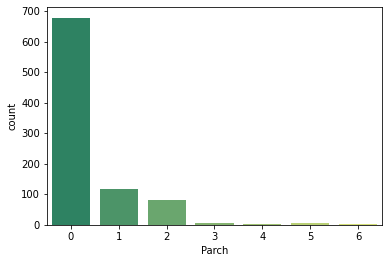

In [15]:
sns.countplot(x='Parch',data=titanic,palette='summer')

# Data Wrangling

In [16]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

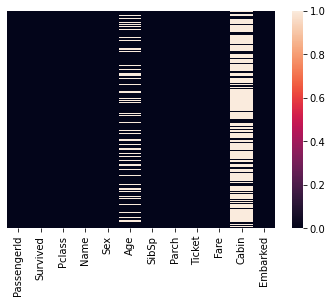

In [21]:
sns.heatmap(titanic.isnull(),yticklabels=False)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

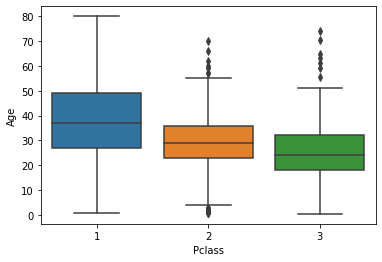

In [22]:
sns.boxplot(x='Pclass',y='Age',data=titanic)

In [23]:
titanic.drop('Cabin',axis=1,inplace=True)

In [99]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [ ]:
#Dropping the columns with missing values

In [25]:
titanic.dropna(inplace=True)

<AxesSubplot:>

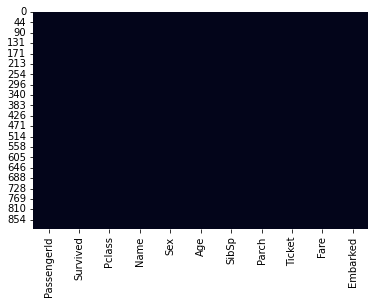

In [30]:
sns.heatmap(titanic.isnull(),cbar=False)

In [31]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [32]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Encoding the Categorical columns

In [49]:
titanic.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':'2'}}, inplace=True)

In [50]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


# Separating features and target

In [54]:
x=titanic.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)

In [55]:
y=titanic['Survived']

In [56]:
print(x)

     Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0         3    0  22.0      1      0   7.2500        0
1         1    1  38.0      1      0  71.2833        1
2         3    1  26.0      0      0   7.9250        0
3         1    1  35.0      1      0  53.1000        0
4         3    0  35.0      0      0   8.0500        0
..      ...  ...   ...    ...    ...      ...      ...
885       3    1  39.0      0      5  29.1250        2
886       2    0  27.0      0      0  13.0000        0
887       1    1  19.0      0      0  30.0000        0
889       1    0  26.0      0      0  30.0000        1
890       3    0  32.0      0      0   7.7500        2

[712 rows x 7 columns]


In [57]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64


# Splitting the data into training and test data

In [58]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [68]:
print(x.shape,X_train.shape,X_test.shape)

(712, 7) (569, 7) (143, 7)


# Model Training

In [100]:
"""Logistic Regression
-we get a sigmoid function in case of logistic regression..."""

'Logistic Regression\n-we get a sigmoid function in case of logistic regression...'

In [69]:
model=LogisticRegression()

In [73]:
logisticregressor=model.fit(X_train,Y_train)

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Model Evaluation

In [74]:
X_trainpred=model.predict(X_train)

In [89]:
train_accuracy_score=accuracy_score(Y_train,X_trainpred)

In [90]:
print(train_accuracy_score)

0.8014059753954306


In [91]:
X_testpred=model.predict(X_test)

In [92]:
print(X_testpred)

[1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0
 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1]


In [95]:
test_accuracy_score=accuracy_score(Y_test,X_testpred)

In [96]:
print(test_accuracy_score)

0.7622377622377622
